# Prediction of Wine type using Deep Learning

We use deep learning for the large data sets but to understand the concept of deep learning, 
we use the small data set of wine quality. You can find the wine quality data set from the UCI Machine Learning Repository 
which is available for free. The aim of this article is to get started with the libraries of deep learning such as Keras, etc 
and to be familiar with the basis of neural network. 
About the Data Set : 
Before we start loading in the data, it is really important to know about your data. 
The data set consist of 12 variables that are included in the data. Few of them are as follows – 
 


        1. Fixed acidity : The total acidity is divided into two groups: the volatile acids and 
           the nonvolatile or fixed acids.The value of this variable is represented by in gm/dm3 in the data sets.

        2. Volatile acidity: The volatile acidity is a process of wine turning into vinegar. 
           In this data sets, the volatile acidity is expressed in gm/dm3.

        3. Citric acid : Citric acid is one of the fixed acids in wines. It’s expressed in g/dm3 in the data sets.

        4. Residual Sugar : Residual Sugar is the sugar remaining after fermentation stops, or is stopped.
           It’s expressed in g/dm3 in the data set.

        5. Chlorides : It can be a important contributor to saltiness in wine. 
           The value of this variable is represented by in gm/dm3 in the data sets.

        6. Free sulfur dioxide : It is the part of the sulfur dioxide that is added to a wine.
           The value of this variable is represented by in gm/dm3 in the data sets.

        7. Total Sulfur Dioxide : It is the sum of the bound and the free sulfur dioxide.
           The value of this variable is represented by in gm/dm3 in the data sets.
 

# Step #1: Know your data.

In [2]:
# Loading the data. 

# Import Required Libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')


In [3]:
# First rows of `red`
red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Last rows of `white`
white.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
# Take a sample of five rows of `red`
red.sample(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
792,7.1,0.61,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,6
39,7.3,0.45,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5
1145,8.2,0.20,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4,6
1410,6.6,0.96,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,6


In [6]:
# Describe `white`
white.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
# Check for null values in `red`.

# Double check for null values in `red`
pd.isnull(red)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


# Step #2: Distribution of Alcohol.

 

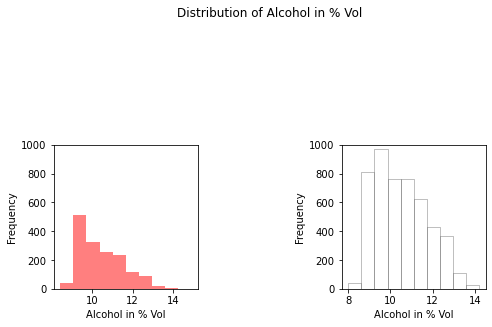

In [8]:
#Creating Histogram. 
# Create Histogram
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor ='red',
			alpha = 0.5, label ="Red wine")

ax[1].hist(white.alcohol, 10, facecolor ='white',
		ec ="black", lw = 0.5, alpha = 0.5,
		label ="White wine")

fig.subplots_adjust(left = 0, right = 1, bottom = 0, 
			top = 0.5, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()


In [9]:
# Splitting the data set for training and validation. 

In [14]:
# Add `type` column to `red` with price one
red['type'] = 1

# Add `type` column to `white` with price zero
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index = True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9084\120391132.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wines = red.append(white, ignore_index = True)


In [19]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [20]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [21]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [31]:

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
X = wines.iloc[:,0:11]
y = np.ravel(wines.type)

# Splitting the data set for training and validating 
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.34, random_state = 45)


# Step #3: Structure of Network

In [28]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(11, )))

# Add one hidden layer
model.add(Dense(9, activation ='relu'))

# Add an output layer
model.add(Dense(1, activation ='sigmoid'))

# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy', 
optimizer ='adam', metrics =['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                144       
                                                                 
 dense_4 (Dense)             (None, 9)                 117       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


# Step #4: Training and Prediction

In [ ]:
# Training Model
model.fit(X_train, y_train, epochs = 3,
		batch_size = 1, verbose = 1)

# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)